# First model training

In [1]:
import pandas as pd

In [2]:
import numpy as np 
import time 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from eml.datanavig import off_columns_dict
from IPython.lib.deepreload import reload as dreload
pd.set_option("display.max_columns", 200, "display.max_rows", 200)

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Final Preprocessing Steps

In [ ]:
df = pd.read_csv(r'C:\Users\Antoine\Coding Bootcamp\Open Food Facts\df_fitmodel_1.csv', low_memory=False)

In [100]:
features = df.drop(columns=['pnns_groups_2'])
target = df['pnns_groups_2']

In [119]:
target.unique()

['dressings and sauces', 'one-dish meals', 'bread', 'vegetables', 'biscuits and cakes', ..., 'ice cream', 'alcoholic beverages', 'offals', 'fruit nectars', 'pizza pies and quiches']
Length: 40
Categories (40, object): ['dressings and sauces', 'one-dish meals', 'bread', 'vegetables', ..., 'alcoholic beverages', 'offals', 'fruit nectars', 'pizza pies and quiches']

In [109]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.10)

x_sample = x_train[:30000]
y_sample = y_train[:30000]

In [123]:
len(set(y_test)), len(set(y_train))

(40, 40)

In [110]:
x_train.shape, x_test.shape

((136982, 311), (15221, 311))

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

### On sample

In [112]:
classifier = RandomForestClassifier(
    n_estimators = 80, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 5, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)

In [113]:
%time classifier.fit(x_sample, y_sample)

Wall time: 3.85 s


RandomForestClassifier(max_depth=5, n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=42)

In [106]:
from eml.model_eval import classifier_metrics, get_classification_report, plot_confusion_matrix

In [114]:
y_preds = classifier.predict(x_test)
classifier_metrics(y_test=y_test, y_preds=y_preds, average='weighted', model='RF Sample')

RF Sample Classification Metrics :
-------------------
Accuracy : 31.85%
Recall : 31.85%
Precision : 31.26%
F1-score : 23.85%




Text(0.5,1,'Precision by category')

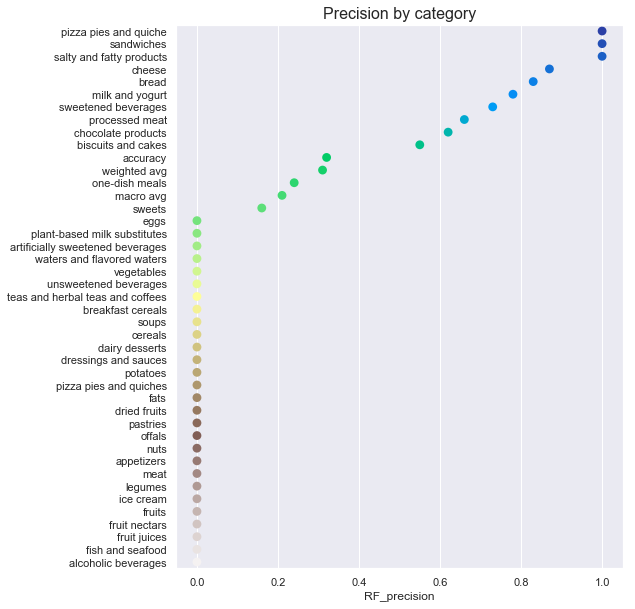

In [115]:
report = get_classification_report(y_test, y_preds, model='Random Forest', sortby='precision')
plt.figure(figsize=(8,10))
sns.pointplot(y=report.index, x=report['RF_precision'], palette='terrain')
plt.title('Precision by category', fontsize=16)

### On full data

Wall time: 19.9 s
RF Sample Classification Metrics :
-------------------
Accuracy : 41.99%
Recall : 41.99%
Precision : 49.40%
F1-score : 35.69%


None


Text(0.5,1,'Precision by category')

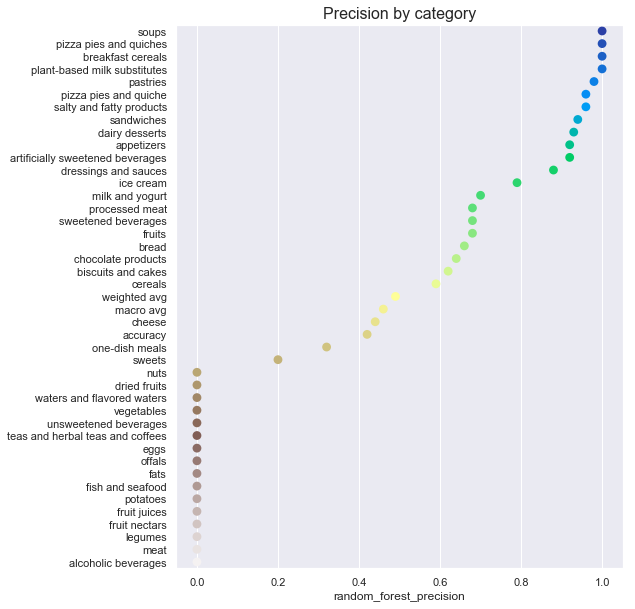

In [124]:
classifier = RandomForestClassifier(
    n_estimators = 100, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = 10, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'sqrt', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)
%time classifier.fit(x_train, y_train)
y_preds = classifier.predict(x_test)
print(classifier_metrics(y_test=y_test, y_preds=y_preds, average='weighted', model='RF Sample'))
report = get_classification_report(y_test, y_preds, model='random_forest', sortby='precision')
plt.figure(figsize=(8,10))
sns.pointplot(y=report.index, x=report['random_forest_precision'], palette='terrain')
plt.title('Precision by category', fontsize=16)

In [128]:
pd.set_option("display.max_columns", 200, "display.max_rows", 500)
features_importance = pd.DataFrame(x_train.columns, columns=['Feature'])
features_importance['Feature Importance'] = classifier.feature_importances_
features_importance = features_importance.sort_values(by='Feature Importance', ascending=False)
features_importance.head(30)

,Feature,Feature Importance
10,sodium_100g,0.117551
11,sel,0.056963
54,poudres à lever,0.044310
63,carbonates de sodium,0.042504
22,beurre de cacao,0.033389
13,eau,0.032663
50,ferments lactiques,0.031124
62,poudre à lever,0.030732
12,sucre,0.029234
49,nitrite de sodium,0.028890


### Changing max depth

Wall time: 34.2 s
RF Sample Classification Metrics :
-------------------
Accuracy : 60.69%
Recall : 60.69%
Precision : 66.11%
F1-score : 58.97%


None


Text(0.5,1,'Precision by category')

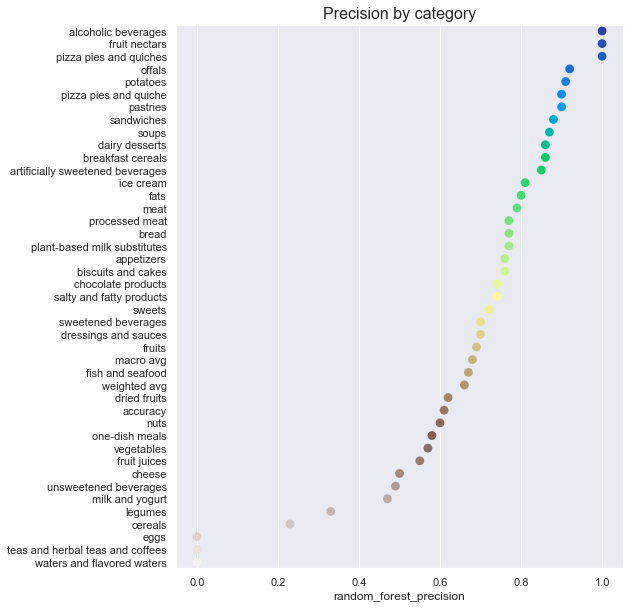

In [129]:
classifier = RandomForestClassifier(
    n_estimators = 100, #rajouter arbres
    class_weight = None,
    criterion = 'gini',
    max_depth = 30, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'sqrt', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)
%time classifier.fit(x_train, y_train)
y_preds = classifier.predict(x_test)
print(classifier_metrics(y_test=y_test, y_preds=y_preds, average='weighted', model='RF Sample'))
report = get_classification_report(y_test, y_preds, model='random_forest', sortby='precision')
plt.figure(figsize=(8,10))
sns.pointplot(y=report.index, x=report['random_forest_precision'], palette='terrain')
plt.title('Precision by category', fontsize=16)

In [131]:
from sklearn import metrics

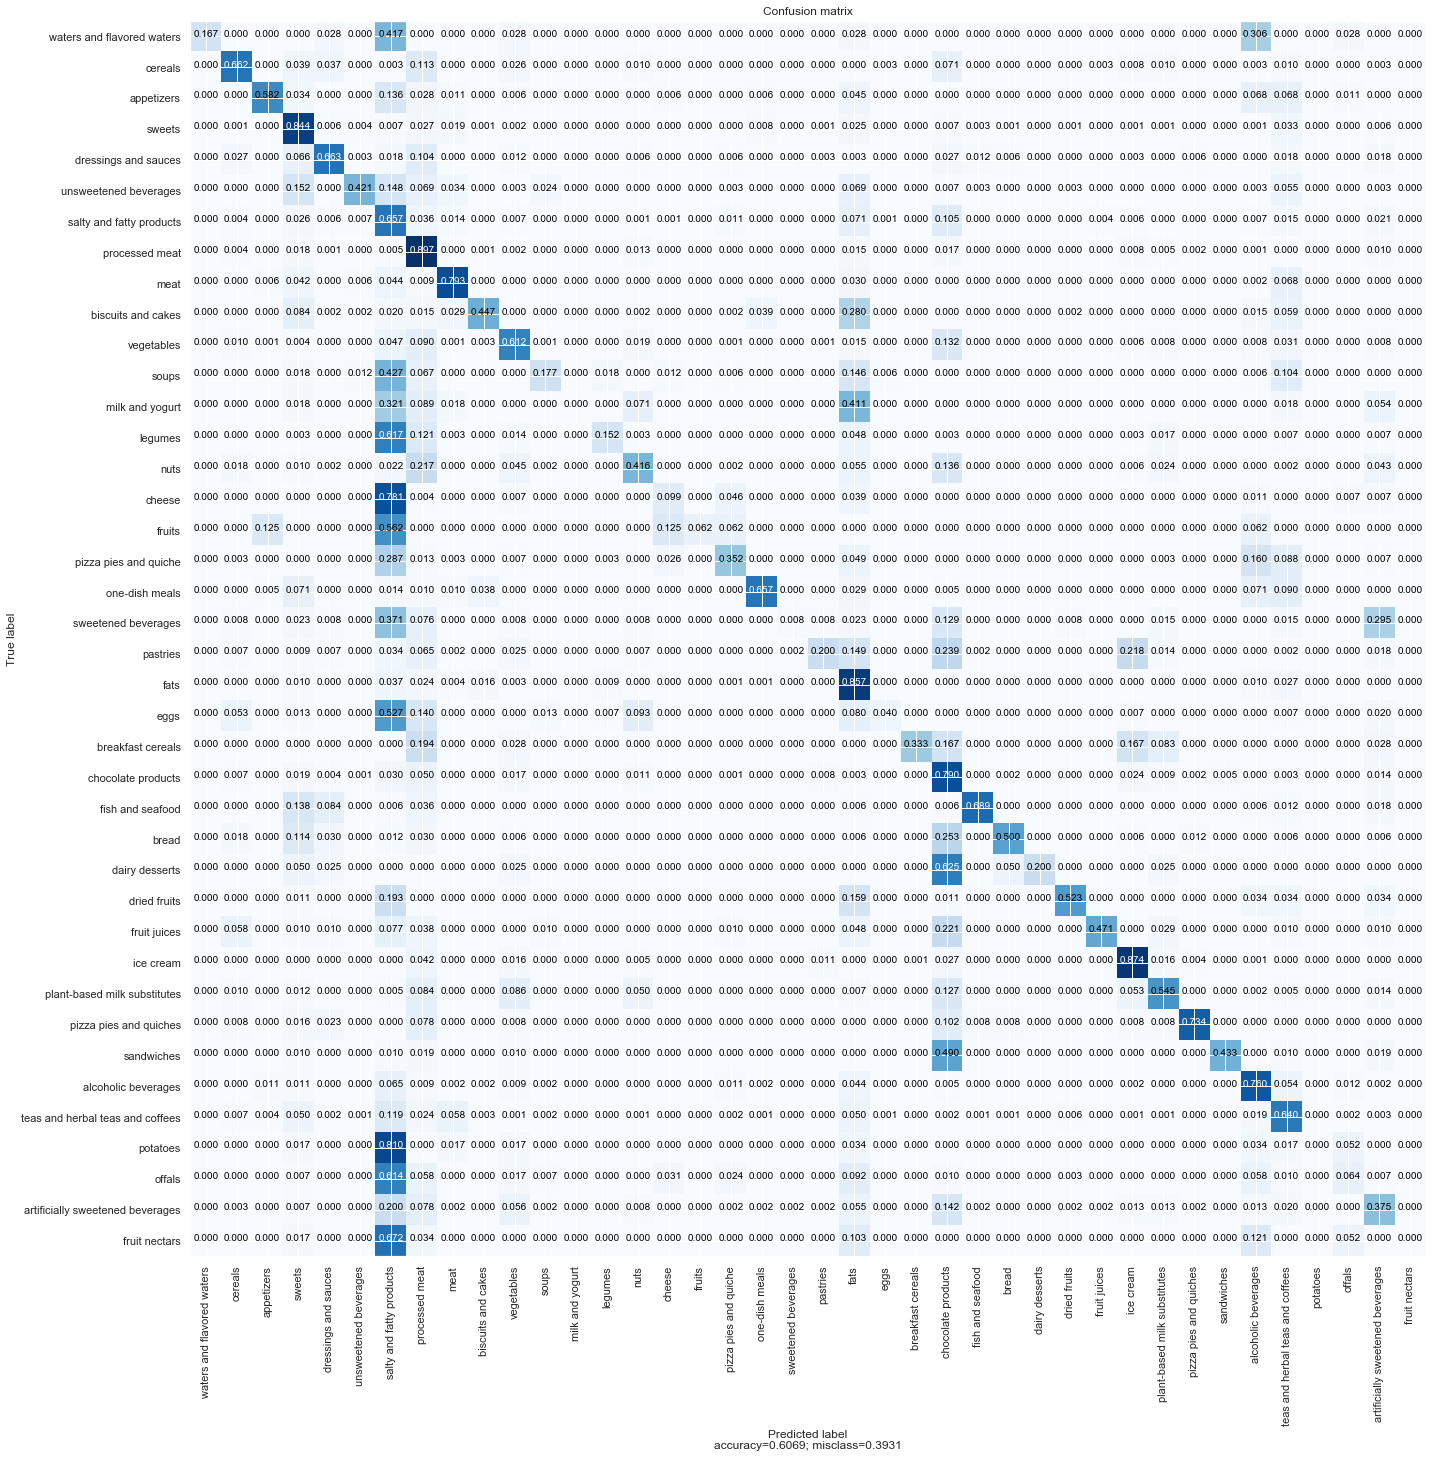

In [133]:
plot_confusion_matrix(cm=metrics.confusion_matrix(y_test, y_preds), target_names=y_test.unique(), figsize=(20,20), cmap='Blues')

Wall time: 10min 3s
RF Sample Classification Metrics :
-------------------
Accuracy : 64.06%
Recall : 64.06%
Precision : 68.22%
F1-score : 63.09%


None


Text(0.5,1,'Precision by category')

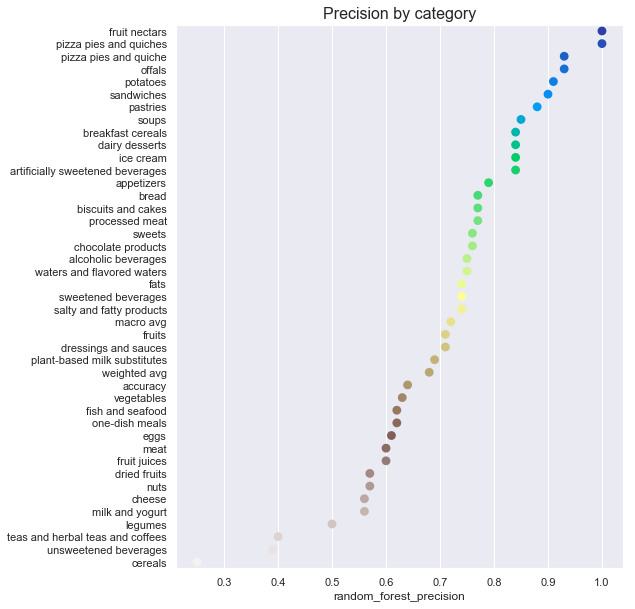

In [137]:
classifier = RandomForestClassifier(
    n_estimators = 1000, #rajouter arbres
    class_weight = None,
    criterion = 'gini',
    max_depth = 50, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'sqrt', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)
%time classifier.fit(x_train, y_train)
y_preds = classifier.predict(x_test)
print(classifier_metrics(y_test=y_test, y_preds=y_preds, average='weighted', model='RF Sample'))
report = get_classification_report(y_test, y_preds, model='random_forest', sortby='precision')
plt.figure(figsize=(8,10))
sns.pointplot(y=report.index, x=report['random_forest_precision'], palette='terrain')
plt.title('Precision by category', fontsize=16)